Train Accuracy: 0.9715
Test Accuracy: 0.7862
Train F1 Score: 0.9715
Test F1 Score: 0.7855
Classification Report:
               precision    recall  f1-score   support

       anger       0.77      0.78      0.78      1346
     disgust       0.94      0.98      0.96      1287
        fear       0.77      0.77      0.77      1304
   happiness       0.77      0.72      0.74      1342
     neutral       0.74      0.73      0.74      1325
     sadness       0.74      0.73      0.74      1332
    surprise       0.77      0.79      0.78      1339

    accuracy                           0.79      9275
   macro avg       0.79      0.79      0.79      9275
weighted avg       0.79      0.79      0.79      9275



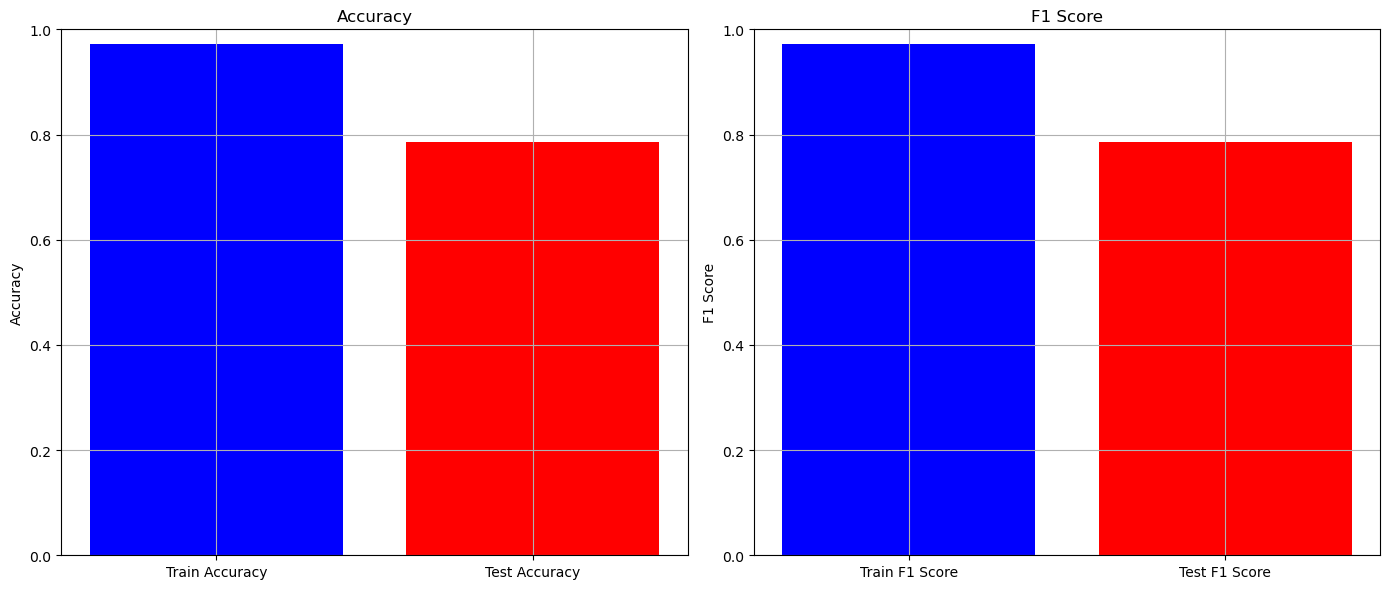

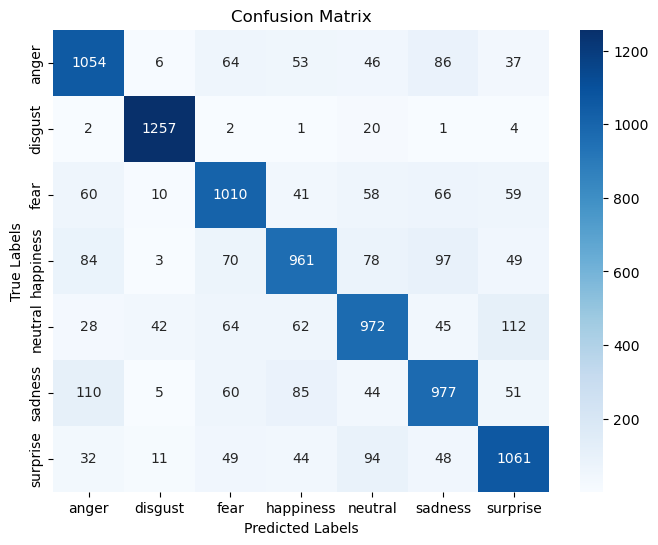

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:/Users/jack/Downloads/cropped_df.csv")


X_text = df['text']
y = df['main_category']


y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)


vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(X_text)


scaler = StandardScaler(with_mean=False)
X_combined = scaler.fit_transform(X_tfidf)


X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


lr_model = LogisticRegression(max_iter=10000, class_weight='balanced', C=0.5)
lr_model.fit(X_train, y_train)


y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Train Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Train F1 Score: {train_f1:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')


print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=y_encoder.classes_))


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['b', 'r'])
axes[0].set_title('Accuracy')
axes[0].set_ylim([0, 1])
axes[0].set_ylabel('Accuracy')
axes[0].grid(True)


axes[1].bar(['Train F1 Score', 'Test F1 Score'], [train_f1, test_f1], color=['b', 'r'])
axes[1].set_title('F1 Score')
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('F1 Score')
axes[1].grid(True)

plt.tight_layout()
plt.show()


cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



Corrected_Emotion
neutral      2405
happiness     650
surprise      313
sadness       198
fear          168
anger          85
disgust        36
Name: count, dtype: int64


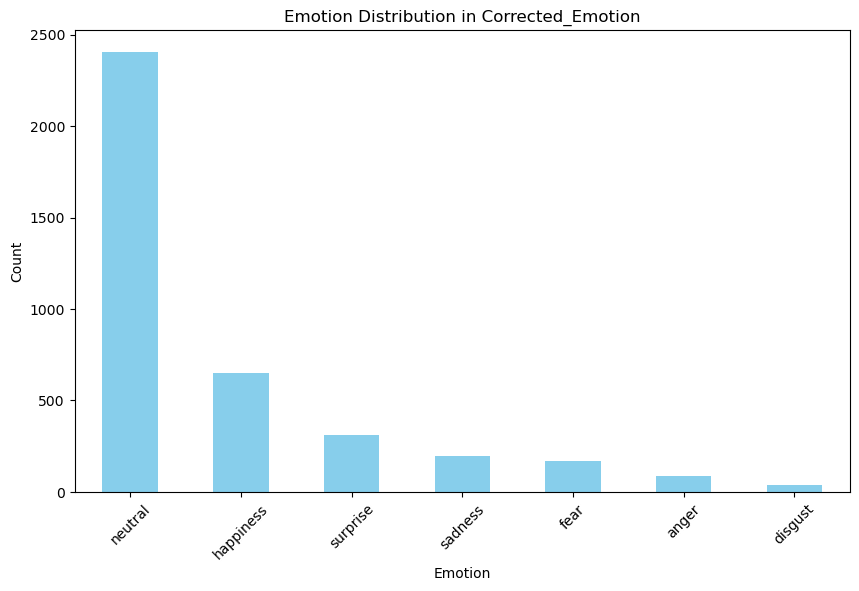

In [19]:
# Count the number of times each emotion appears in the 'Corrected_Emotion' column
emotion_counts = df['Corrected_Emotion'].value_counts()

# Display the counts
print(emotion_counts)

# Optionally, plot the counts as a bar chart
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Distribution in Corrected_Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()